# **ONLINE RETAIL TRANSACTION ANALYSIS**

This dataset contains information on transactions made by customers through an online retail platform. The dataset includes data on the products that were purchased, the quantity of each product, the date and time of each transaction, the price of each product, the unique identifier for each customer who made a purchase, and the country where each customer is located. This dataset can be used to analyze customer behavior and preferences, identify popular products, and optimize pricing and marketing strategies. The dataset is well-suited for data analysis and machine learning applications, as it contains a large volume of transactional data that can be used to train predictive models and make data-driven decisions.

## Objectives

* Obtain the dataset from Kaggle
* Understand customer behaviour 
* Identify popular products 
* Identify customer purchasing habits
* Analyse seasonality to identify trends 
* Optimise pricing strategies 
* Identify customer geographic location 


## Inputs

* Dataset obtained from Kaggle - https://www.kaggle.com/datasets/abhishekrp1517/online-retail-transactions-dataset

## Outputs

* Clean dataset
* Generated visualisation for insights inline with the objectives

## Additional Comments

* I would like to propose various insights and recommendations to understand the objectives and how sales can improve




---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\moby1\\Documents\\Hackathon1_project\\Hackathon1\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\moby1\\Documents\\Hackathon1_project\\Hackathon1'

# Section 1:
## Loading raw dataset and cleaning

It is crucial in the online retail industry who your customers are, the purchasing habits and what can be done in order to improve sales. Identifying returning customers allows a business strategy of promotions to increase and retain business from those customers. It is also important to understand what are the most popular products as well as products are not doing so good in sales. This in turn will aid inventory management as well as identifying discarding or bringing in new lines of products based on customers purchasing history.

I will now import the libraries needed for this project below.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set_style('whitegrid')
from sklearn.pipeline import Pipeline

In [5]:
import pandas as pd

df = pd.read_csv("C:\\Users\\moby1\\Documents\\Hackathon1_project\\Hackathon1\\Dataset\\raw_data\\Online_Retail.csv")

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


* The dataset has already been viewed in Microsoft Excel for understanding and what needs cleaning. Identifying that duplicates exist and within the dataset, missing cells in the description column.

In [6]:
df.isnull().sum()


InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64

* Above we can see that missing cells exist within the dataset under the column description
* We will check now for duplicate rows

In [7]:
df.duplicated().sum()

5268

* Above we can see that duplicate rows exist and a count of 5268 duplicates which will need removing.
* Below duplicates will be removed 

In [8]:
clean_data = df.drop_duplicates()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


* Below is an overview of the dataset displaying the size of the dataset, list of columns, if and how many missing values within the dataset.

In [9]:
df_info = {
    "Shape": clean_data.shape, #size of dataset
    "Columns": clean_data.columns.tolist(), #list of column names
    "Missing Values": clean_data.isnull().sum().to_dict(), #identify missing values in each column
    "Sample Data": clean_data.head(8).to_dict() #sample data of 8 rows
}

df_info

{'Shape': (536641, 8),
 'Columns': ['InvoiceNo',
  'StockCode',
  'Description',
  'Quantity',
  'InvoiceDate',
  'UnitPrice',
  'CustomerID',
  'Country'],
 'Missing Values': {'InvoiceNo': 0,
  'StockCode': 0,
  'Description': 1454,
  'Quantity': 0,
  'InvoiceDate': 0,
  'UnitPrice': 0,
  'CustomerID': 0,
  'Country': 0},
 'Sample Data': {'InvoiceNo': {0: '536365',
   1: '536365',
   2: '536365',
   3: '536365',
   4: '536365',
   5: '536365',
   6: '536365',
   7: '536366'},
  'StockCode': {0: '85123A',
   1: '71053',
   2: '84406B',
   3: '84029G',
   4: '84029E',
   5: '22752',
   6: '21730',
   7: '22633'},
  'Description': {0: 'WHITE HANGING HEART T-LIGHT HOLDER',
   1: 'WHITE METAL LANTERN',
   2: 'CREAM CUPID HEARTS COAT HANGER',
   3: 'KNITTED UNION FLAG HOT WATER BOTTLE',
   4: 'RED WOOLLY HOTTIE WHITE HEART.',
   5: 'SET 7 BABUSHKA NESTING BOXES',
   6: 'GLASS STAR FROSTED T-LIGHT HOLDER',
   7: 'HAND WARMER UNION JACK'},
  'Quantity': {0: 6, 1: 6, 2: 8, 3: 6, 4: 6, 5: 2, 6:

* In the dataset within the description column, I noticed on Microsoft Excel, values which are not product descriptions but hold no unit price or have minus quantity. for example: check, ?, Manual, faulty, POSTAGE and some others. Below I will only make a copy of the raw dataset filling in the missing cells and adding a new feature.

In [10]:
clean_data = df.copy() #copy of the data to be stored in the clean dataset

clean_data['Description'] = clean_data['Description'].fillna('Miscellaneous') #fill in missing cells

clean_data['Total_Transaction_Value'] = clean_data['Quantity'] * clean_data['UnitPrice'] #new column added


In [11]:
clean_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Transaction_Value
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


* Below we have an overview of the cleaned dataset which now shows 9 columns instead of 8, as we added in another column "Total_Transaction_Value". We can also see there are no missing cells under the column description

In [12]:
df_info = {
    "Shape": clean_data.shape, #size of dataset
    "Columns": clean_data.columns.tolist(), #list of column names
    "Missing Values": clean_data.isnull().sum().to_dict(), #identify missing values in each column
    "Sample Data": clean_data.head(8).to_dict() #sample data of 8 rows
}

df_info

{'Shape': (541909, 9),
 'Columns': ['InvoiceNo',
  'StockCode',
  'Description',
  'Quantity',
  'InvoiceDate',
  'UnitPrice',
  'CustomerID',
  'Country',
  'Total_Transaction_Value'],
 'Missing Values': {'InvoiceNo': 0,
  'StockCode': 0,
  'Description': 0,
  'Quantity': 0,
  'InvoiceDate': 0,
  'UnitPrice': 0,
  'CustomerID': 0,
  'Country': 0,
  'Total_Transaction_Value': 0},
 'Sample Data': {'InvoiceNo': {0: '536365',
   1: '536365',
   2: '536365',
   3: '536365',
   4: '536365',
   5: '536365',
   6: '536365',
   7: '536366'},
  'StockCode': {0: '85123A',
   1: '71053',
   2: '84406B',
   3: '84029G',
   4: '84029E',
   5: '22752',
   6: '21730',
   7: '22633'},
  'Description': {0: 'WHITE HANGING HEART T-LIGHT HOLDER',
   1: 'WHITE METAL LANTERN',
   2: 'CREAM CUPID HEARTS COAT HANGER',
   3: 'KNITTED UNION FLAG HOT WATER BOTTLE',
   4: 'RED WOOLLY HOTTIE WHITE HEART.',
   5: 'SET 7 BABUSHKA NESTING BOXES',
   6: 'GLASS STAR FROSTED T-LIGHT HOLDER',
   7: 'HAND WARMER UNION JAC

* Below are some descriptive statistics. This analysis shows the total sales, average transaction value, number of unique customers, popular products being sold and popular countries.

In [13]:
total_sales = clean_data['Total_Transaction_Value'].sum() #sum of sales
average_transaction_value = clean_data['Total_Transaction_Value'].mean() #average trasnaction value
no_unique_customers = clean_data['CustomerID'].nunique() #unique customers
popular_products = clean_data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(8) #popular products
popular_country = clean_data.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(5) #popular countries

#display statistic summary
stats_summary = {
    "Total Sales": total_sales,
    "Average Transaction Value": average_transaction_value,
    "Number of Unique Customers": no_unique_customers,
    "Top 8 Products" : popular_products.to_dict(),
    "Top 5 Countries" : popular_country.to_dict()

}
stats_summary


{'Total Sales': 9747747.933999998,
 'Average Transaction Value': 17.98779487699964,
 'Number of Unique Customers': 4372,
 'Top 8 Products': {'WORLD WAR 2 GLIDERS ASSTD DESIGNS': 53847,
  'JUMBO BAG RED RETROSPOT': 47363,
  'ASSORTED COLOUR BIRD ORNAMENT': 36381,
  'POPCORN HOLDER': 36334,
  'PACK OF 72 RETROSPOT CAKE CASES': 36039,
  'WHITE HANGING HEART T-LIGHT HOLDER': 35317,
  'RABBIT NIGHT LIGHT': 30680,
  'MINI PAINT SET VINTAGE ': 26437},
 'Top 5 Countries': {'United Kingdom': 4263829,
  'Netherlands': 200128,
  'EIRE': 142637,
  'Germany': 117448,
  'France': 110480}}

* Save cleansed dataset to clean_data folder

In [14]:
clean_data.to_csv("C:\\Users\\moby1\\Documents\\Hackathon1_project\\Hackathon1\\Dataset\\clean_data\\Clean_Online_Retail.csv")

* Below is a monthly sales trend analysis for the entire dataset

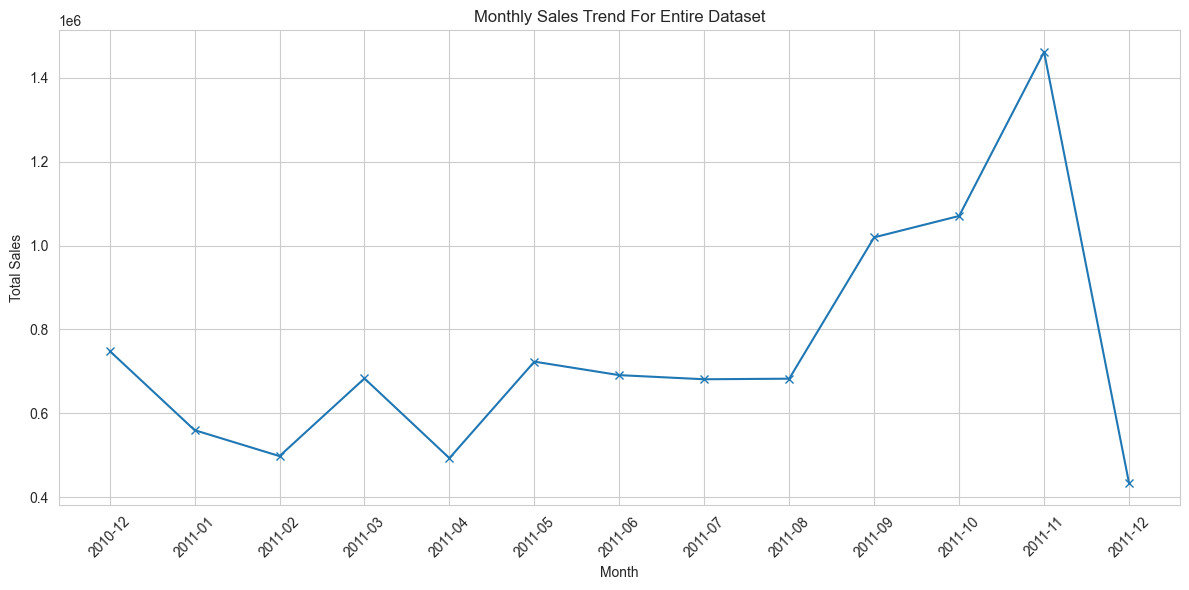

In [15]:
clean_data['InvoiceDate'] = pd.to_datetime(clean_data['InvoiceDate']) #convert into datetime format

clean_data['Month'] = clean_data['InvoiceDate'].dt.to_period('M').astype(str) #converting the format to just year and month

monthly_sales = clean_data.groupby('Month')['Total_Transaction_Value'].sum().reset_index() #grouping month with total transaction value per month

plt.figure(figsize=(12, 6)) #size
plt.plot(monthly_sales['Month'], monthly_sales['Total_Transaction_Value'], marker='x') #plot line graph with the marker of x at each month point

plt.title('Monthly Sales Trend For Entire Dataset') #title
plt.xlabel('Month') #label
plt.ylabel('Total Sales') #label
plt.xticks(rotation=45) #rotate label
plt.tight_layout()
plt.show()

* Below is a view of monthly sales by value

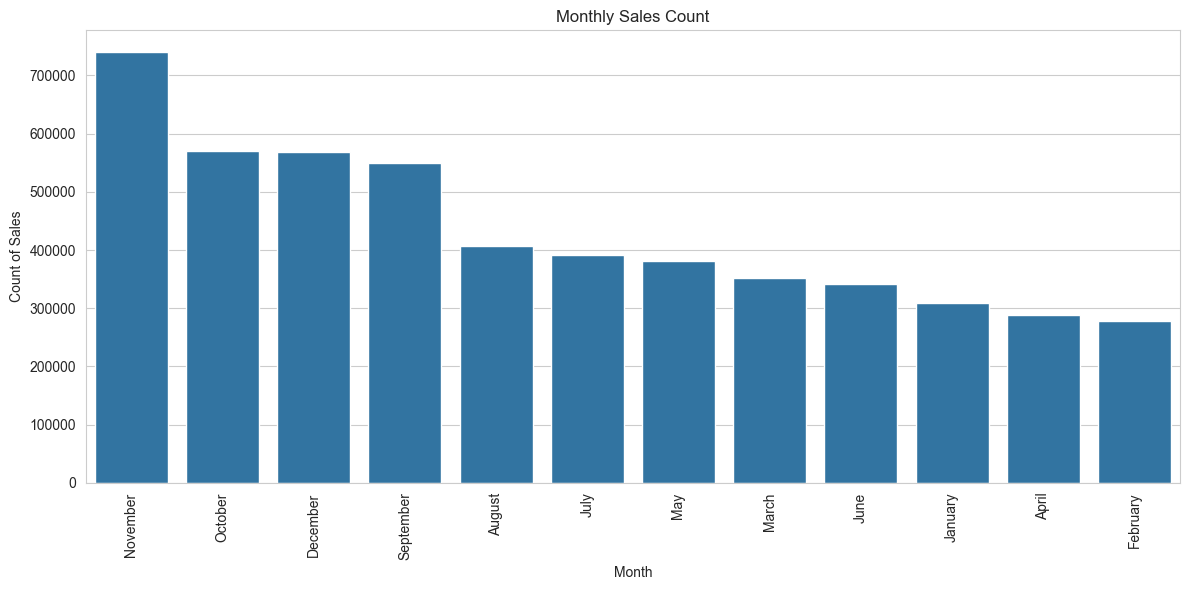

In [16]:
clean_data['Month'] = clean_data['InvoiceDate'].dt.month_name() #get month name

monthly_sales_count = clean_data.groupby('Month')['Quantity'].sum().sort_values(ascending=False) #calculate monthly sales

plt.figure(figsize=(12, 6)) #size
sns.barplot(x=monthly_sales_count.index, y=monthly_sales_count.values) #plits bar chart using month name and quantity sold
plt.title('Monthly Sales Count') #title
plt.xlabel('Month')
plt.ylabel('Count of Sales')
plt.xticks(rotation=90) #rotate label
plt.tight_layout()
plt.show()

* Displaying top 8 Unique Customers - Quantity Purchased

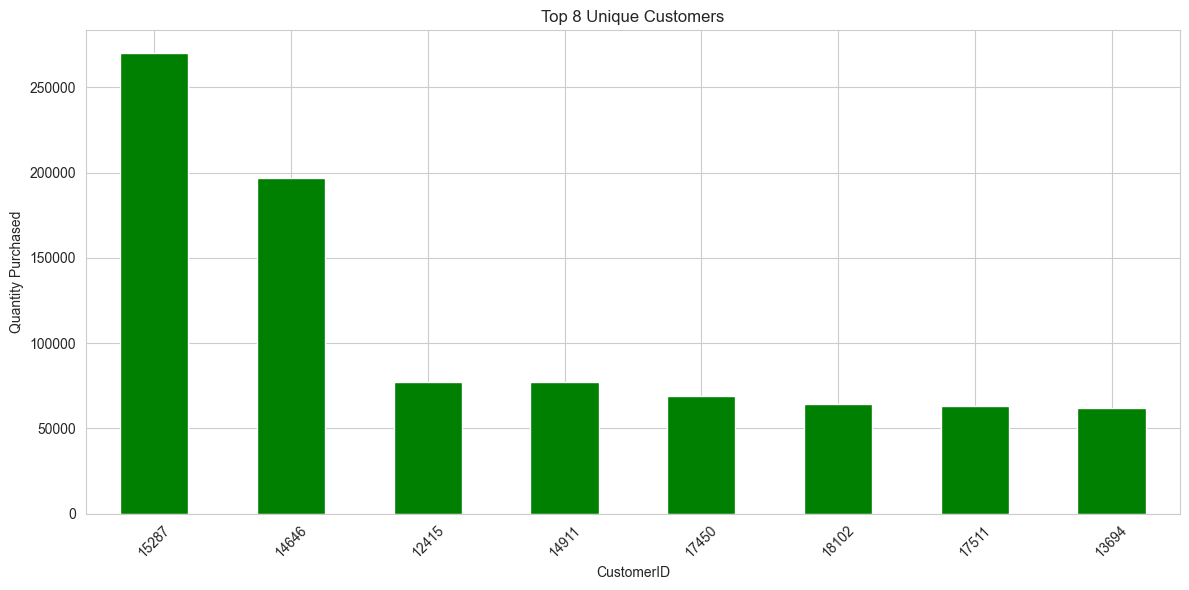

In [17]:
no_unique_customers = clean_data.groupby('CustomerID')['Quantity'].sum().sort_values(ascending=False).head(8) #group customer and quantity to get top 8

plt.figure(figsize=(12,6)) #size
no_unique_customers.plot(kind='bar', color='green') #horizontal bar plot with green bars
plt.title('Top 8 Unique Customers') # title
plt.xlabel('CustomerID') #label
plt.ylabel('Quantity Purchased') #label
plt.xticks(rotation=45) #rotate labels
plt.tight_layout()
plt.show()


* Displaying the top 8 most popular products

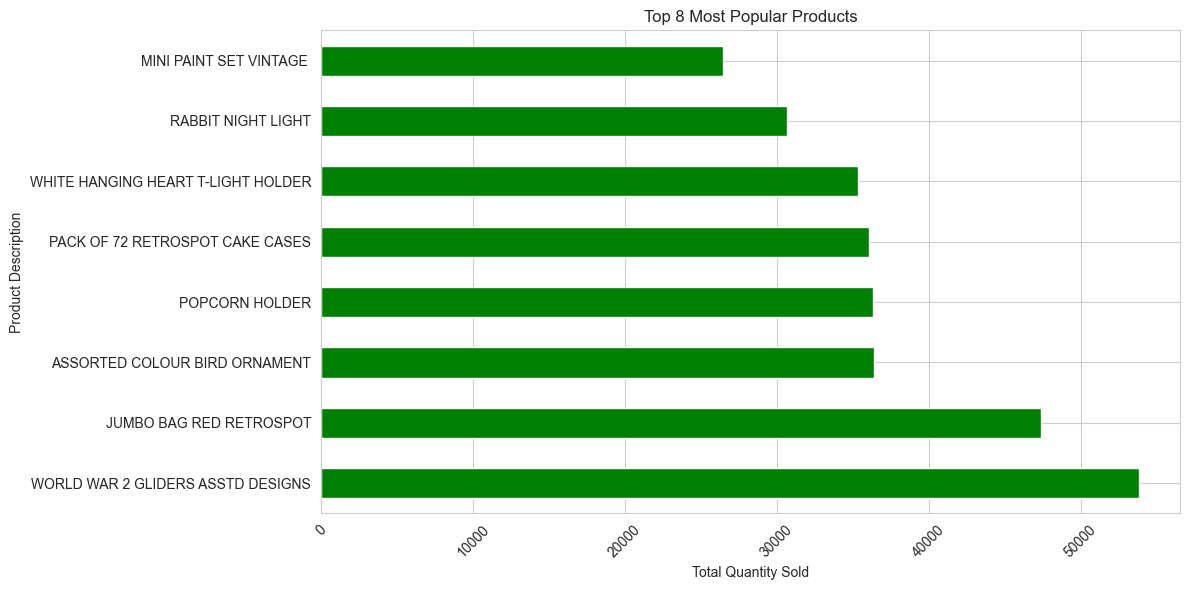

In [18]:
popular_products = clean_data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(8) #group description and quantity to get top 8

plt.figure(figsize=(12,6)) #size
popular_products.plot(kind='barh', color='green') #horizontal bar plot with green bars
plt.title('Top 8 Most Popular Products') # title
plt.xlabel('Total Quantity Sold') #label
plt.ylabel('Product Description') #label
plt.xticks(rotation=45) #rotate labels
plt.tight_layout()
plt.show()


* Now I just want to investigate what top 4 countries are buying the number one product. Later in the notebook I will display the top 4 popular countries to see if the countries for the number one product changes.

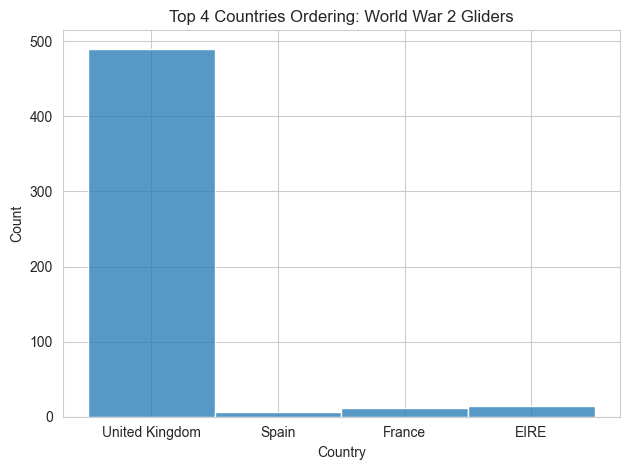

In [19]:
gliders_data = clean_data[clean_data['Description'] == "WORLD WAR 2 GLIDERS ASSTD DESIGNS"] #filter specific product

top_countries = gliders_data['Country'].value_counts().head(4).index #top countries for specific product

gliders_top_countries = gliders_data[gliders_data['Country'].isin(top_countries)] #filter only in the top 4 countries

sns.histplot(data=gliders_top_countries, x='Country', discrete=True) #plot chart
plt.title("Top 4 Countries Ordering: World War 2 Gliders") #title
plt.tight_layout()
plt.show()

* Below I have displayed the quantity vs total value for the number one product. This product shows it is usually purchased in small volumes at low cost. Considering the product is the number one product, but has low value per sale, bundling or upselling might be an opportunity to improve sales.

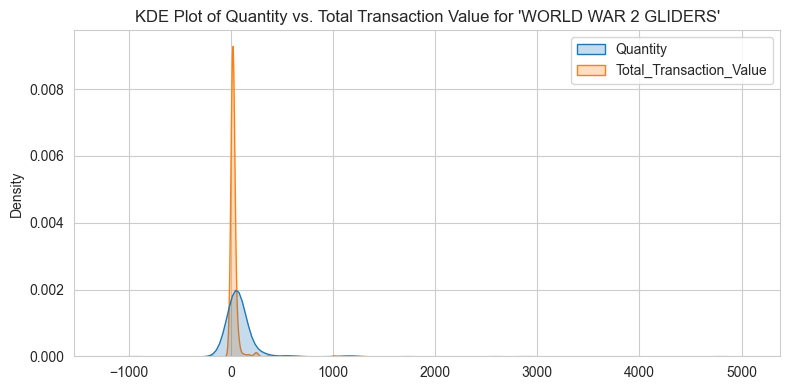

In [20]:
ww2_gliders = clean_data[clean_data['Description'].str.contains('WORLD WAR 2 GLIDERS ASSTD DESIGNS', case=False, na=False)]

fig, ax = plt.subplots(figsize=(8, 4))
sns.kdeplot(data=ww2_gliders[['Quantity', 'Total_Transaction_Value']], fill=True, ax=ax)

plt.title("KDE Plot of Quantity vs. Total Transaction Value for 'WORLD WAR 2 GLIDERS'")
plt.tight_layout()
plt.show()

* Displaying The Top 5 Most Popular Products (UK Only)

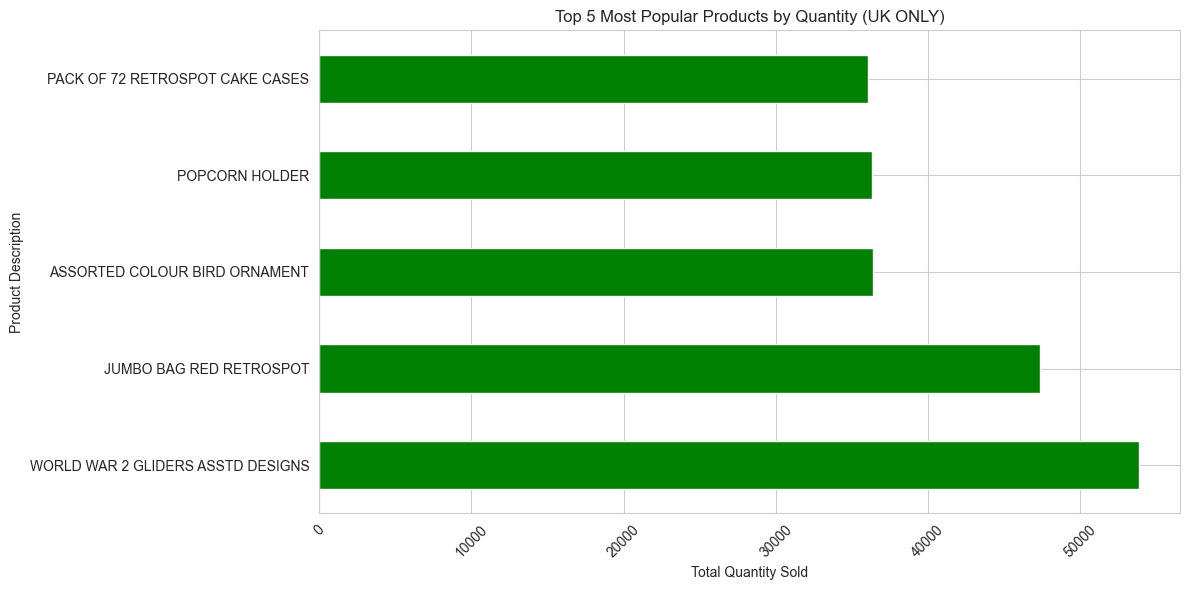

In [21]:
uk_only = clean_data[clean_data['Country'] == 'United Kingdom'] #filter UK only

popular_products = clean_data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(12,6))
popular_products.plot(kind='barh', color='green')
plt.title('Top 5 Most Popular Products by Quantity (UK ONLY)')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Description')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* Displaying Top 4 Most Popular Countries - Distribution. As we can see below, Spain has not been included, even though spain is one of the top contributors towards the most popular product. 

Country
United Kingdom    495478
Germany             9495
France              8557
EIRE                8196
Name: count, dtype: int64


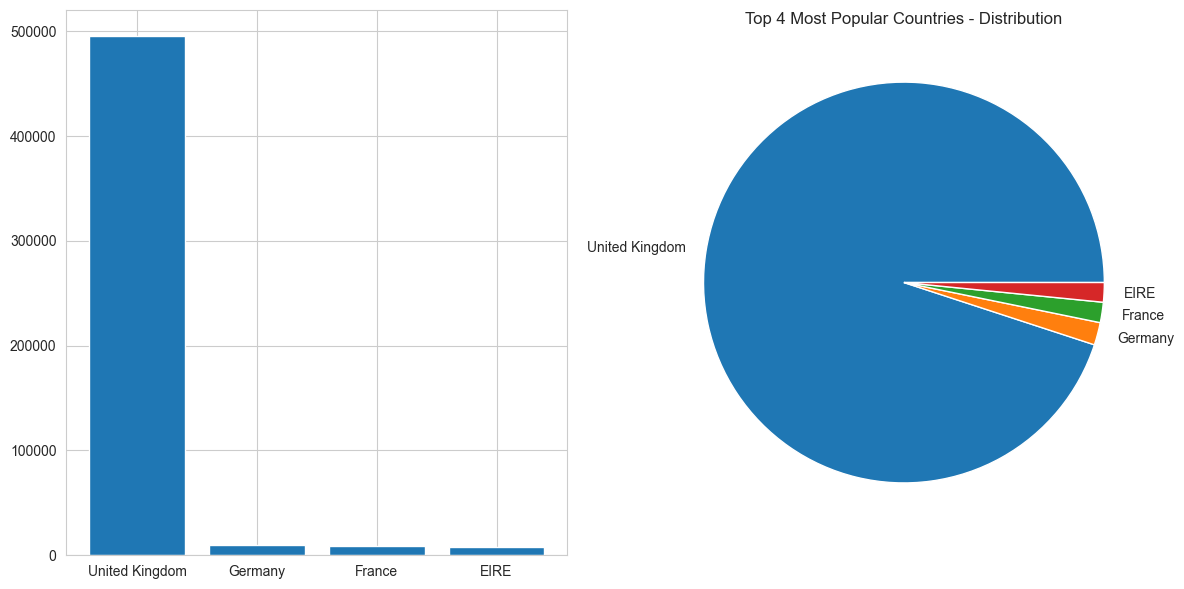

In [22]:
popular_country_count = clean_data['Country'].value_counts().head(4) #distribution count for top 4 countries
print(popular_country_count) #print statement

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6)) #set 1 row with 2 columns for charting

popular_country = df['Country'].value_counts().head(4) #top 4 countries 
axes[0].bar(x=popular_country.index, height=popular_country) #left chart to be a barchart


popular_country = df.value_counts('Country',normalize=True).head(4) #top 4 countries
axes[1].pie(x=popular_country, labels=popular_country.index) #right chart to be piechart

plt.title('Top 4 Most Popular Countries - Distribution') #title
plt.tight_layout()
plt.show()

* Below displayed is a boxplot to see our number one product sales in our busiest month (November). It seems the product is definitely ordered in small quantities, however the outliers (higher end) might suggest this product is being purchased in bulk. 

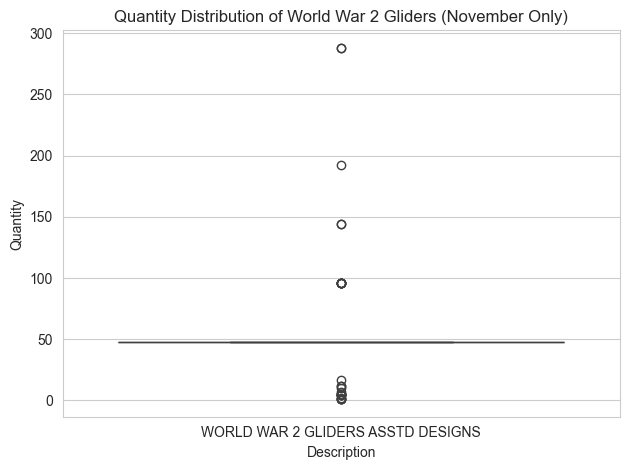

In [23]:
clean_data['Month'] = clean_data['InvoiceDate'].dt.month_name()

november_gliders = clean_data[
    (clean_data['Description'] == 'WORLD WAR 2 GLIDERS ASSTD DESIGNS') &
    (clean_data['Month'] == 'November')
]

sns.boxplot(data=november_gliders, x='Description', y='Quantity')
plt.title('Quantity Distribution of World War 2 Gliders (November Only)')
plt.tight_layout()
plt.show()

---

# Section 2

# Hypothesis and Data Visualisation 

* In this section I aim to create some insights based on 3 different hypotheses ti improve sales performance. This is a testing phase in order to see if the strategies applied validate assumptions about the dataset and recommendations.

* Hypothesis one - the most popular products generate higher revenue during a particular season in the year, highlighting the importance of aligning inventory and marketing strategies with seasonal buying behavior

In [30]:
import plotly.io as pio


clean_data['InvoiceDate'] = pd.to_datetime(clean_data['InvoiceDate']) #convert to datetime format

clean_data['Month'] = clean_data['InvoiceDate'].dt.to_period('M').astype(str) #select month from invoicedate column

popular_products = clean_data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(8).index #group product with quantity sold

popular_products_data = clean_data[clean_data['Description'].isin(popular_products)] #only include rows where the popular 8 exist

monthly_sales = popular_products_data.groupby(['Month', 'Description'])['Quantity'].sum().reset_index() #calculate total quantity per product per month

fig = px.line(monthly_sales, x='Month', y='Quantity', #line chart x and y axis
               color='Description', #line value
               title='Monthly Sales Trend Analysis On The Top 8 Popular Products', #title
               labels={'Month': 'Month', 'Quantity': 'Quantity Sold', 'Description': 'Product'}, #labels
               markers=True #markers at each month
              )

fig.update_layout(xaxis_tickangle=45) #rotate labels
fig.show()                                            

* Displayed above is a trend analysis over the period of a year for the top 8 most popular products to determine if any of the products contribute towards a seasonal purchase from a customer. November being the busiest month, possibly becuase of the Christmas holiday period, we can see some useful insights. 

* November has a spike in 3 particular products; Rabbit Night Light, Popcorn Holder and World War 2 Gliders ASSTD Design. The World War 2 Gliders seems to spike in April also, suggesting an event, season holiday or bulk orders. The rest of the products displayed show a stable sales without drastic flucutations. There is a small spike in August for Pack of 72 Retrospot Cake Cases, otherwise stable throughout the year. 

* This data can be used for forecasting and inventory planning such as targerted promotions around those months where the sales typical dips and anticipating stock levels requirements before the most peak months i.e. April and November.

* Hypothesis two - The drive for the majority of the revenue comes from the contributions made by the top 8 most popular customers

In [ ]:
clean_data['InvoiceDate'] = pd.to_datetime(clean_data['InvoiceDate']) #converts into datetime format

filtered_data = clean_data[clean_data['Total_Transaction_Value'] > 0] # remove negative values

filtered_data['Month'] = filtered_data['InvoiceDate'].dt.to_period('M').astype(str) #filter month

monthly_revenue = filtered_data.groupby('Month')['Total_Transaction_Value'].sum().reset_index() #group month and total rev


fig = px.area(
    monthly_revenue,
    x='Month',
    y='Total_Transaction_Value',
    title='Monthly Revenue (Excl. Negative Values)',
    labels={'Month': 'Month', 'Total_Transaction_Value': 'Total Revenue (£)'}
)

fig.update_layout(xaxis_tickangle=45)
fig.show()



C:\Users\moby1\AppData\Local\Temp\ipykernel_24524\3688574539.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



* I want to investigate how many unique customers exist in the dataset

In [39]:
num_customers = clean_data['CustomerID'].nunique()

print(f"Number of customers in the dataset: {num_customers}")

Number of customers in the dataset: 4372


* Now i know how many unique customers are in the dataset, I want to take 10% of the total 437 and plot an area chart to investigate if 10% of the customers are the drive for the overall revenue.

In [49]:
clean_data['InvoiceDate'] = pd.to_datetime(clean_data['InvoiceDate']) #converts into datetime format

filtered_data = clean_data[clean_data['Total_Transaction_Value'] > 0] #remove negative values

top_10per_customers = clean_data.groupby('CustomerID')['Total_Transaction_Value'] \
                            .sum().nlargest(437).index #top 10% popular customers by rev

top_data = clean_data[clean_data['CustomerID'].isin(top_10per_customers)].copy() #filter to only include the 10% customers

top_data['Month'] = top_data['InvoiceDate'].dt.to_period('M').astype(str) #filter month


monthly_revenue = top_data.groupby(['Month', 'CustomerID'])['Total_Transaction_Value'].sum().reset_index() #group month and customer, calculate rev


fig = px.area(
    monthly_revenue,
    x='Month',
    y='Total_Transaction_Value',
    color='CustomerID',
    title='Top 10% Customer Monthly Revenue',
    labels={'Month': 'Month','Total_Transaction_Value': 'Revenue (£)','CustomerID': 'Customer ID'}
)

fig.update_layout(xaxis_tickangle=45)
fig.show()

* The peaks in both charts are almost identical, confirming the top 10% of overall customers account for majority of the sales. This insight also suggests that without these high-valued customers, revenue would be much lower, therefore are critical to the business

* Hypothesis three - Quarter 4 of the year (Oct-Dec) has an increase on sales due to the seasonal holidays

In [58]:
clean_data['InvoiceDate'] = pd.to_datetime(clean_data['InvoiceDate']) #convert format to datetime

clean_data = clean_data[clean_data['Total_Transaction_Value'] > 0] #remove negative values 

clean_data['Month'] = clean_data['InvoiceDate'].dt.to_period('M').astype(str) #filter month

monthly_rev = clean_data.groupby('Month')['Total_Transaction_Value'].sum().reset_index() #group rev to month

fig = px.scatter(
    monthly_rev,
    x='Month',
    y='Total_Transaction_Value',
    title='Total Monthly Sales Revenue (Excl. Negative Values)',
    labels={'Month': 'Month', 'Total_Transaction_Value': 'Total Revenue (£)'},
    )

fig.show()

* Displayed above is a scatterplot where we can see the overall sales throughout the year by month. We can see that revenue significantly increases in the fourth quarter which suggests strong seasonal sales. November has the highest sales of the year at £1.5m, this again may suggest preparation for the Christmas period. We do see sales performance drop by just under £1m in December, this may be due to early shopping in the previous months  

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [28]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)


IndentationError: expected an indented block after 'try' statement on line 2 (553063055.py, line 5)